In [170]:
#import modules
import os
import glob
import pandas as pd
from datetime import datetime
os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios")
all_filenames1 = [i for i in glob.glob('*.{}'.format('csv'))]
combined_crash_csv = pd.concat([pd.read_csv(f) for f in all_filenames1])
os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\NonCrashScenarios")
all_filenames2 = [j for j in glob.glob('*.{}'.format('csv'))]
combined_noncrash_csv = pd.concat([pd.read_csv(f) for f in all_filenames2])
# os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios")
# combined_crash_csv = pd.concat([pd.read_csv(f) for f in all_filenames1])
# os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\NonCrashScenarios")
# combined_noncrash_csv = pd.concat([pd.read_csv(f) for f in all_filenames2])
combined_csv = pd.concat([combined_crash_csv,combined_noncrash_csv])
combined_csv = combined_csv.sample(frac=1).reset_index(drop=True)
currentDateAndTime = datetime.now()
currentDateTime = currentDateAndTime.strftime("%d_%m_%Y__%H_%M")
csvname = "D:\\NewFinalDatasetsForNeuralNetwork\\crash_noncrash_combined_csv_"+ currentDateTime + ".csv"
#export to csv
combined_csv.to_csv(csvname , index=False, encoding='utf-8-sig')

In [171]:
import pandas as pd
dataset = pd.read_csv('D:\\NewFinalDatasetsForNeuralNetwork\\crash_noncrash_combined_csv_09_03_2023__13_24.csv')
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,-11.434253,-1.6,4.3,1.388889,inf
1,12.465866,-4.0,2.5,1.388889,inf
2,42.308881,-4.0,4.5,1.388889,2.888906
3,-19.452802,-0.8,1.4,1.388889,inf
4,-1.497305,-2.6,0.4,1.388889,inf
...,...,...,...,...,...
8257,17.478287,-1.5,0.9,1.388889,1.080133
8258,7.499135,-3.5,0.1,1.388889,inf
8259,12.485525,-1.0,0.9,1.388889,0.720089
8260,48.383731,-4.6,1.7,1.388889,3.313458


In [172]:
print(min(dataset['TTC']))
print(max(dataset['TTC']))

0.0
inf


In [42]:
# import numpy as np

# # Create a new column 'TTC Category' and bin values based on their range
# bins = [0, 7, np.inf]
# labels = ['crash', 'no_crash']
# dataset['SCENARIO TYPE'] = pd.cut(dataset['TTC'], bins=bins, labels=labels)

In [173]:
import numpy as np
dataset_TTC = np.array(dataset['TTC'])
data_transformed = (np.where(np.isinf(dataset_TTC), 0, 1))

dataset['SCENARIO TYPE'] = data_transformed

In [174]:
print(dataset.loc[dataset['SCENARIO TYPE'].isna()])

Empty DataFrame
Columns: [NORMALIZED PEDESTRIAN POSITION X, NORMALIZED PEDESTRIAN POSITION Y, NORMALIZED PEDESTRIAN DIRECTION, NORMALIZED PEDESTRIAN SPEED, TTC, SCENARIO TYPE]
Index: []


In [175]:
# dataset['SCENARIO TYPE'] = data_transformed
dataset = dataset.drop('TTC', axis=1)
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,SCENARIO TYPE
0,-11.434253,-1.6,4.3,1.388889,0
1,12.465866,-4.0,2.5,1.388889,0
2,42.308881,-4.0,4.5,1.388889,1
3,-19.452802,-0.8,1.4,1.388889,0
4,-1.497305,-2.6,0.4,1.388889,0
...,...,...,...,...,...
8257,17.478287,-1.5,0.9,1.388889,1
8258,7.499135,-3.5,0.1,1.388889,0
8259,12.485525,-1.0,0.9,1.388889,1
8260,48.383731,-4.6,1.7,1.388889,1


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Select column to one hot encode
# col_to_encode = 'SCENARIO TYPE'

# # Perform one hot encoding
# one_hot_encoded = pd.get_dummies(dataset[col_to_encode], prefix=col_to_encode)

# # Append one hot encoded columns to original dataset
# dataset = pd.concat([dataset, one_hot_encoded], axis=1)

# # Drop original column that was one hot encoded
# dataset = dataset.drop(col_to_encode, axis=1)
# dataset


In [176]:
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
#X = dataset.drop(columns=["SCENARIO TYPE_crash", "SCENARIO TYPE_no_crash"]).values
X = dataset.drop(columns=["SCENARIO TYPE"]).values
y = dataset[["SCENARIO TYPE"]].values
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
X

array([[-11.43425284,  -1.6       ,   4.3       ,   1.38888889],
       [ 12.46586591,  -4.        ,   2.5       ,   1.38888889],
       [ 42.30888111,  -4.        ,   4.5       ,   1.38888889],
       ...,
       [ 12.48552457,  -1.        ,   0.9       ,   1.38888889],
       [ 48.38373054,  -4.6       ,   1.7       ,   1.38888889],
       [ 14.48441358,  -4.2       ,   0.8       ,   1.38888889]])

In [177]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
# Defining first layer of the neural network, which normalizes the input data on the fly
normalizer_layer = keras.layers.Normalization(axis=-1)
normalizer_layer = keras.layers.Normalization(input_shape=[4,], axis=None)
# Adapting normalizer layer to the input train data shape
normalizer_layer.adapt(np.array(X_train))

# Defines the model and compilation
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      normalizer_layer,
      keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
      keras.layers.Dense(64, activation='sigmoid'),
       keras.layers.Dense(32, activation='relu'),
      #keras.layers.Dense(128, activation='relu'),
      #keras.layers.Dense(64, activation='relu'),
      #keras.layers.Dense(128, activation='sigmoid'),
      #keras.layers.Dense(64, activation='relu'),
      #keras.layers.Dense(y.shape[1], activation="softmax")
      #keras.layers.Dense(y.shape[1], activation="softmax")
      #keras.layers.Dense(y.shape[1],activation='sigmoid')
      keras.layers.Dense(1)
  ])

 # nn_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["binary_accuracy"])
  #nn_model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])
  #nn_model.compile(loss="mse", optimizer='sgd', metrics=["binary_accuracy"])
  nn_model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=["binary_accuracy"])
  return nn_model

In [178]:
dnn_model = build_and_compile_model(normalizer_layer)
# Train the model
history = dnn_model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = dnn_model.evaluate(X_test, y_test)
print("Test set accuracy:", accuracy)

Epoch 1/100
52/52 [==============================] - 1s 8ms/step - loss: 0.6417 - binary_accuracy: 0.7016 - val_loss: 0.4660 - val_binary_accuracy: 0.7187
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4503 - binary_accuracy: 0.7293 - val_loss: 0.4483 - val_binary_accuracy: 0.7266
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4259 - binary_accuracy: 0.7567 - val_loss: 0.4208 - val_binary_accuracy: 0.7798
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3994 - binary_accuracy: 0.7894 - val_loss: 0.3851 - val_binary_accuracy: 0.8240
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3673 - binary_accuracy: 0.8316 - val_loss: 0.3548 - val_binary_accuracy: 0.8482
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3367 - binary_accuracy: 0.8694 - val_loss: 0.3218 - val_binary_accuracy: 0.8711
Epoch 7/100
52/52 [==============================] - 0s 4ms/step - los

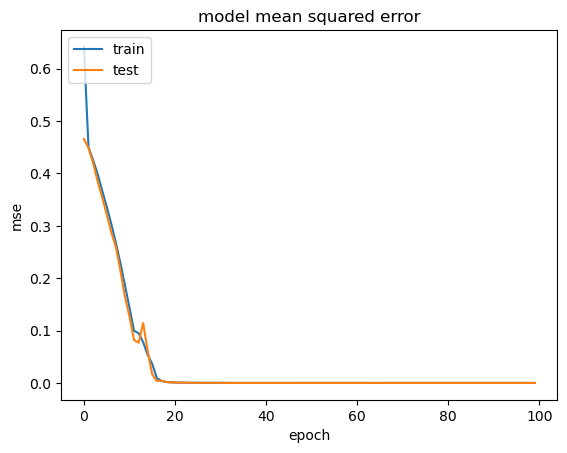

In [179]:
import matplotlib.pyplot as plt
# Summarize history for Loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
import math
print(y_test[:10])
prediction = dnn_model.predict(X_test[:10])
print(prediction)
print([int(a) for a in prediction])

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 20ms/step
[[ 1.0843736 ]
 [ 1.2899046 ]
 [ 1.4180579 ]
 [-0.10791451]
 [ 1.1047419 ]
 [ 1.1435167 ]
 [-0.07855111]
 [ 1.2509848 ]
 [ 1.3475443 ]
 [ 1.2241726 ]]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [ ]:
# dn_model = build_and_compile_model(normalizer_layer)
# # Train the model
# dn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = dn_model.evaluate(X_test, y_test)
# print("Test set accuracy:", accuracy)

In [13]:
# from keras.utils import plot_model

# plot_model(dnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
